In [1]:
%matplotlib inline
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
import matplotlib.pyplot as plt

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position



In [3]:
NFLX = pd.read_csv("/Users/fahad/project_repo/data/final/Moving_Average_Preparation/NFLX_MA_prep.csv", index_col=0)

In [4]:
NFLX.Date = pd.to_datetime(NFLX.Date, format="%Y-%m-%d")

In [5]:
NFLX = NFLX.set_index(NFLX['Date'])

In [6]:
# GOOG = GOOG.drop("Date", axis=1)


In [7]:
NFLX.head()

Open    High      Low    Close   Volume       Date
Date                                                            
2019-08-15  299.50  300.63  288.000  292.865  5629691 2019-08-15
2019-08-14  308.01  308.41  298.005  299.110  7355753 2019-08-14
2019-08-13  309.77  316.43  308.160  312.280  5289400 2019-08-13
2019-08-12  305.46  312.89  303.240  310.830  6531700 2019-08-12
2019-08-09  313.74  316.64  305.680  308.930  5349059 2019-08-09

In [8]:
plt.style.use('ggplot')

In [9]:
NFLX.index

DatetimeIndex(['2019-08-15', '2019-08-14', '2019-08-13', '2019-08-12',
               '2019-08-09', '2019-08-08', '2019-08-07', '2019-08-06',
               '2019-08-05', '2019-08-02',
               ...
               '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
               '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
               '2010-01-05', '2010-01-04'],
              dtype='datetime64[ns]', name='Date', length=2421, freq=None)

/Users/fahad/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


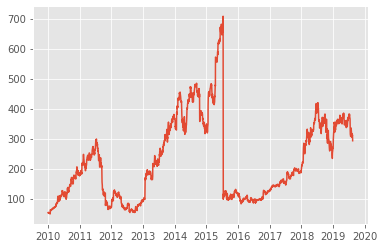

In [10]:
plt.plot(NFLX.index,NFLX.Close)


In [11]:
NFLX = NFLX[::-1]

In [12]:
#dictionary to store equity
equity_dict = dict()

In [13]:
class SmaCrossTrailing(TrailingStrategy):
            
    n1 = 50
    n2 = 200
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.set_trailing_sl(4)
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if crossover(self.sma1, self.sma2) and (position.is_long!=True):
            
            #print (position.is_long)
                        
            
            self.buy()

        elif crossover(self.sma2, self.sma1):
            
            self.sell()
                        
        

            
#     def next(self):
#         #super().next()
#                 # If sma1 crosses above sma2, buy the asset
#         if crossover(self.sma1, self.sma2):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.buy()

#         # Else, if sma1 crosses below sma2, sell it
#         elif crossover(self.sma2, self.sma1):
#             #print (Strategy.equity.__get__(self))
#             #print (self.data.index[-1])
#             equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
#             self.sell()
            

        
        

In [14]:
bt = Backtest(NFLX, SmaCrossTrailing, cash=10000, commission=.01)

bt.run()

Start                     2010-01-04 00:00:00
End                       2019-08-15 00:00:00
Duration                   3510 days 00:00:00
Exposure [%]                          77.6638
Equity Final [$]                      13844.2
Equity Peak [$]                         63453
Return [%]                            38.4419
Buy & Hold Return [%]                 447.616
Max. Drawdown [%]                    -86.4958
Avg. Drawdown [%]                    -6.59721
Max. Drawdown Duration      188 days 00:00:00
Avg. Drawdown Duration       26 days 00:00:00
# Trades                                    7
Win Rate [%]                          57.1429
Best Trade [%]                        292.529
Worst Trade [%]                      -72.9109
Avg. Trade [%]                        49.7035
Max. Trade Duration         770 days 00:00:00
Avg. Trade Duration         390 days 00:00:00
Expectancy [%]                        88.8668
SQN                                  0.129024
Sharpe Ratio                      

In [15]:
bt.plot()

In [16]:
df = pd.DataFrame.from_dict([equity_dict])

In [17]:
df = df.T

In [18]:
df.columns = ['Equity']

In [19]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/Moving_Average/NFLX_Moving_Average_Equity.csv")

In [20]:
df

Equity
2010-10-19  10000.000000
2010-10-20  10000.000000
2010-10-21  10000.000000
2010-10-22  10000.000000
2010-10-25  10000.000000
2010-10-26  10000.000000
2010-10-27  10000.000000
2010-10-28  10000.000000
2010-10-29  10000.000000
2010-11-01  10000.000000
2010-11-02  10000.000000
2010-11-03  10000.000000
2010-11-04  10000.000000
2010-11-05  10000.000000
2010-11-08  10000.000000
2010-11-09  10000.000000
2010-11-10  10000.000000
2010-11-11  10000.000000
2010-11-12  10000.000000
2010-11-15  10000.000000
2010-11-16  10000.000000
2010-11-17  10000.000000
2010-11-18  10000.000000
2010-11-19  10000.000000
2010-11-22  10000.000000
2010-11-23  10000.000000
2010-11-24  10000.000000
2010-11-26  10000.000000
2010-11-29  10000.000000
2010-11-30  10000.000000
...                  ...
2019-07-05  17989.198493
2019-07-08  17781.676272
2019-07-09  17959.890116
2019-07-10  18010.470703
2019-07-11  17939.563338
2019-07-12  17644.115984
2019-07-15  17329.759999
2019-07-16  17300.924337
2019-07-17  17133.110240
2019-07-18  15373.189442
2019-07-19  14895.273802
2019-07-22  14683.497138
2019-07-23  14526.555504
2019-07-24  15029.525080
2019-07-25  15432.278913
2019-07-26  15872.850007
2019-07-29  15727.253551
2019-07-30  15407.224977
2019-07-31  15268.246542
2019-08-01  15103.268739
2019-08-02  15071.596783
2019-08-05  14542.155124
2019-08-06  14658.915919
2019-08-07  14384.268058
2019-08-08  14933.091063
2019-08-09  14603.608174
2019-08-12  14693.424170
2019-08-13  14761.967956
2019-08-14  14139.401291
2019-08-15  13844.190295

[2221 rows x 1 columns]

In [21]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
#         print (self.sma1)
#         print (self.sma2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            #print (Strategy.equity.__get__(self))
            #print (self.data.index[-1])
            equity_dict[self.data.index[-1]] = Strategy.equity.__get__(self)
            self.sell()